<a href="https://colab.research.google.com/github/CharanLawha/Practice/blob/main/House_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [8]:
url= 'https://raw.githubusercontent.com/kshitizrohilla/house-price-prediction-using-simple-linear-regression/main/data/house-prices.csv'
df = pd.read_csv(url)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df.sample(8)

,area,price
809,4399,370652.73
565,4655,502571.66
146,4583,406982.33
701,4773,630441.60
869,2679,323234.67
684,2067,281570.78
323,4224,430647.30
615,1468,275229.58


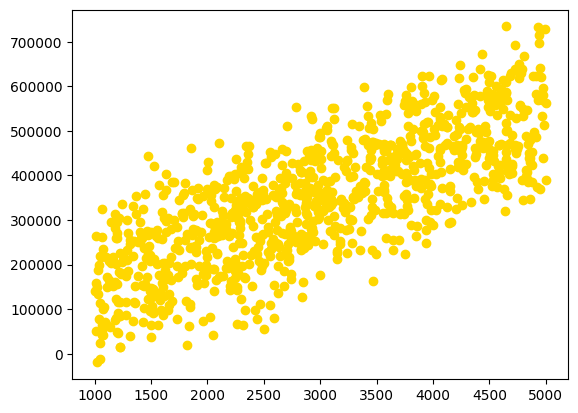

In [9]:
plt.scatter(df['area'],df['price'],color='Gold')
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
X = df.drop(['price'], axis=1)
y= df['price']

In [13]:
df.isnull().sum()

,0
area,0
price,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    1000 non-null   int64  
 1   price   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [23]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size=0.2,random_state=42)

In [24]:

model = LinearRegression()


In [25]:
model.fit(X_train,y_train)


LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error

In [35]:
print("RMSE:", mean_squared_error(y_test, y_pred,))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 8950798003.535492
R² Score: 0.5944921161653371


In [41]:

from sklearn.ensemble import RandomForestRegressor



In [42]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [43]:
y_pred2 = model2.predict(X_test)

In [44]:
print("RMSE:", mean_squared_error(y_test, y_pred2,))
print("R² Score:", r2_score(y_test, y_pred2))

RMSE: 12130186813.836048
R² Score: 0.4504527547761811


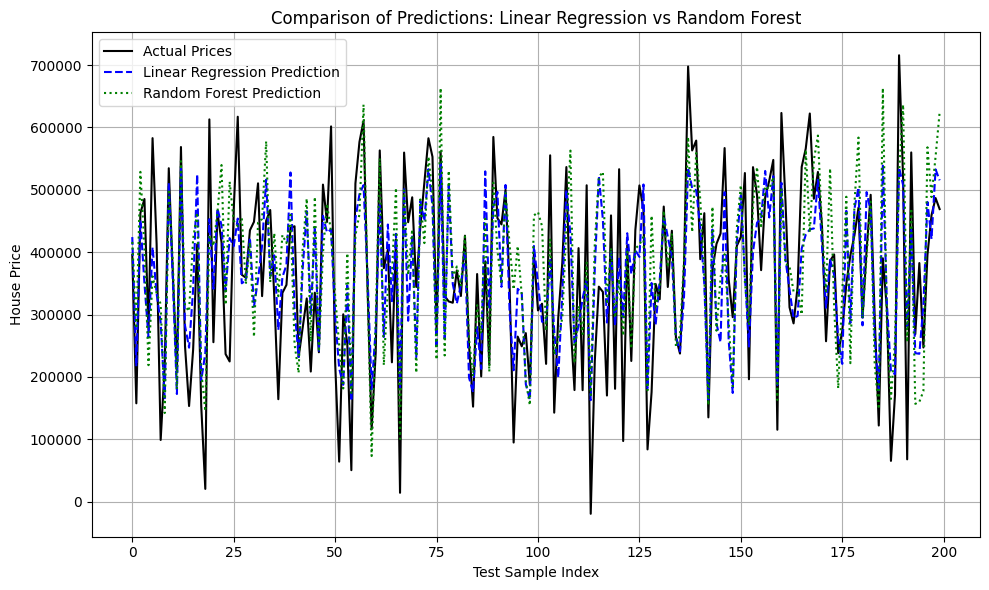

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='black')
plt.plot(y_pred, label='Linear Regression Prediction', linestyle='--', color='blue')
plt.plot(y_pred2, label='Random Forest Prediction', linestyle=':', color='green')

plt.title('Comparison of Predictions: Linear Regression vs Random Forest')
plt.xlabel('Test Sample Index')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()